As a first numerical example, we consider problem of following form:

\begin{aligned} & \mathrm{minimize} &  & \|Dx-d\|_{2}^{2}\\
 & \mathrm{subject\;to} &  & Ax=b\\
 &  &  & 0\preceq x\preceq u\\
 &  &  & x\in\mathbf{Z}^{n},
\end{aligned}


where $x$ is the optimization variable and $A\in\mathbf{Z}^{m\times n},b\in\mathbf{Z}^{m},D\in\mathbf{Z}^{p\times n},d\in\mathbf{Z}^{p}$
are problem data.

format long
m=10;
n=15;
p=20;
l_mat=-1;
u_mat=1;
l=0;
u=100;
x_star =round((u-l).*rand(n,1) + l);
A=randi([l_mat,u_mat],m,n);
D=round((u_mat-l_mat).*rand(p,n) + l_mat);
d=D*x_star;
b=A*x_star;

rank(A)

A;

For integer normal form U_1, U_2, \hat{U} I am going to use mathematica

save('test','A')

Now we do the precalculation part in mathematica. 

```
importedA = 
  Flatten[Import[
    "C:\\Users\\Shuvomoy Das Gupta\\Google \
Drive\\GitHub\\JuliaCodes-EE364b\\JuliaCodes\\test.mat"], 1];

A = Map[Round[#] &, importedA];

{m, n} = Dimensions[A];

IntegerNormalFormCalc[mat_ /; MatrixQ[mat, IntegerQ]] := 
 Transpose /@ HermiteDecomposition[Transpose[mat]]

(*Calc U1 and U2 submatrices *)
U1Calc[mat_ /; MatrixQ[mat, IntegerQ]] := mat[[All, 1 ;; m]]
U2Calc[mat_ /; MatrixQ[mat, IntegerQ]] := mat[[All, m + 1 ;; n]];
(*Define C*)
CCalc[mat_ /; MatrixQ[mat, IntegerQ]] := 
 ArrayFlatten[{{mat, -IdentityMatrix[n]}}]
 ```

Now bring the data back to matlab:

```
{U, B} = IntegerNormalFormCalc[A];
U1 = U1Calc[U];
U2 = U2Calc[U];
cC = CCalc[U2];
{hatU, hatB} = IntegerNormalFormCalc[cC];
hatU1 = hatU1Calc[hatU];
hatU2 = hatU2Calc[hatU];
Export["C:\\Users\\Shuvomoy Das Gupta\\Google \
Drive\\GitHub\\JuliaCodes-EE364b\\JuliaCodes\\U.txt", U, "CSV"];
Export["C:\\Users\\Shuvomoy Das Gupta\\Google \
Drive\\GitHub\\JuliaCodes-EE364b\\JuliaCodes\\B.txt", B, "CSV"];
Export["C:\\Users\\Shuvomoy Das Gupta\\Google \
Drive\\GitHub\\JuliaCodes-EE364b\\JuliaCodes\\U1.txt", U1, "CSV"];
Export["C:\\Users\\Shuvomoy Das Gupta\\Google \
Drive\\GitHub\\JuliaCodes-EE364b\\JuliaCodes\\U2.txt", U2, "CSV"];
Export["C:\\Users\\Shuvomoy Das Gupta\\Google \
Drive\\GitHub\\JuliaCodes-EE364b\\JuliaCodes\\cC.txt", cC, "CSV"];
Export["C:\\Users\\Shuvomoy Das Gupta\\Google \
Drive\\GitHub\\JuliaCodes-EE364b\\JuliaCodes\\hatU.txt", hatU, "CSV"];
Export["C:\\Users\\Shuvomoy Das Gupta\\Google \
Drive\\GitHub\\JuliaCodes-EE364b\\JuliaCodes\\hatU1.txt", hatU1, 
  "CSV"];
Export["C:\\Users\\Shuvomoy Das Gupta\\Google \
Drive\\GitHub\\JuliaCodes-EE364b\\JuliaCodes\\hatU2.txt", hatU2, 
  "CSV"];
```

Now let us load the calculated data back to matlab:

In [121]:
A=csvread('C:\Users\Shuvomoy Das Gupta\Google Drive\GitHub\Graph_splitting_form_over_integers\Numerical_example\A.txt');

In [122]:
x_star=csvread('C:\Users\Shuvomoy Das Gupta\Google Drive\GitHub\Graph_splitting_form_over_integers\Numerical_example\x_star.txt');

In [123]:
b=csvread('C:\Users\Shuvomoy Das Gupta\Google Drive\GitHub\Graph_splitting_form_over_integers\Numerical_example\bvect.txt');

In [124]:
D=csvread('C:\Users\Shuvomoy Das Gupta\Google Drive\GitHub\Graph_splitting_form_over_integers\Numerical_example\matD.txt');

In [125]:
d=csvread('C:\Users\Shuvomoy Das Gupta\Google Drive\GitHub\Graph_splitting_form_over_integers\Numerical_example\dvect.txt');


In [126]:
bounds=csvread('C:\Users\Shuvomoy Das Gupta\Google Drive\GitHub\Graph_splitting_form_over_integers\Numerical_example\bounds.txt');

In [127]:
U=csvread('C:\Users\Shuvomoy Das Gupta\Google Drive\GitHub\Graph_splitting_form_over_integers\Numerical_example\U.txt');

In [128]:
B=csvread('C:\Users\Shuvomoy Das Gupta\Google Drive\GitHub\Graph_splitting_form_over_integers\Numerical_example\B.txt');

In [129]:
U1=csvread('C:\Users\Shuvomoy Das Gupta\Google Drive\GitHub\Graph_splitting_form_over_integers\Numerical_example\U1.txt');

In [130]:
U2=csvread('C:\Users\Shuvomoy Das Gupta\Google Drive\GitHub\Graph_splitting_form_over_integers\Numerical_example\U2.txt');

In [131]:
C=csvread('C:\Users\Shuvomoy Das Gupta\Google Drive\GitHub\Graph_splitting_form_over_integers\Numerical_example\cC.txt');

In [132]:
hatU=csvread('C:\Users\Shuvomoy Das Gupta\Google Drive\GitHub\Graph_splitting_form_over_integers\Numerical_example\hatU.txt');

In [133]:
hatU1=csvread('C:\Users\Shuvomoy Das Gupta\Google Drive\GitHub\Graph_splitting_form_over_integers\Numerical_example\hatU1.txt');

In [134]:
hatU2=csvread('C:\Users\Shuvomoy Das Gupta\Google Drive\GitHub\Graph_splitting_form_over_integers\Numerical_example\hatU2.txt');

In [135]:
hatB=csvread('C:\Users\Shuvomoy Das Gupta\Google Drive\GitHub\Graph_splitting_form_over_integers\Numerical_example\hatB.txt');

In [136]:
l=bounds(1);
u=bounds(2);
[m,n]=size(A);

In [137]:
% One feasible solution
mid_vect=round((0+u)/2)*ones(n,1);

In [138]:
lhs=(mid_vect-(U1*inv(B)*b));

In [139]:
z_init = round(pinv(U2)*(mid_vect-(U1*inv(B)*b))) %least squares solutin does not work very well
%z_init = sils(U2,lhs,1);
x0=U1*inv(B)*b+U2*z_init;
y_init=U2*z_init;
disp(['feasibility of x0 check = ', num2str(norm(A*x0-b))]);


z_init =

    10
    -1
    -4

feasibility of x0 check = 0



In [140]:
% Data for the projection problem:
D_tilde=D*U2;
d_tilde=D*x0-d;

In [141]:
% Test if the initialization is alright
x0


x0 =

     5
     6
     4
     4
     9
     8
     9
     8
     2
     4




In [142]:
norm(D*x0-d)


ans =

  162.3669




In [143]:
% we start with this initial solution
z_k=z_init;
y_k=y_init;
z_tilde_k=z_init;
y_tilde_k=y_init;
length(z_tilde_k)


ans =

     3




In [145]:
flag=0;
tol=0.001;
iter_number=100
z_array=zeros(length(z_tilde_k),iter_number);
for i=1:iter_number
z_k_half=prox_quad_test(D_tilde,d_tilde,z_k-z_tilde_k);
y_k_half=proj_mx0_umx0(y_k-y_tilde_k,x0,u);

w_hat=[z_k_half+z_tilde_k; y_k_half+y_tilde_k];
w_hat_k=proj_nonlinear(w_hat,hatU2);
z_k_pls_1=w_hat_k(1:n-m);
y_k_pls_1=w_hat_k(n-m+1:2*n-m);

z_array(:,i)=z_k_pls_1;

x_test=x0+(U2*z_k_pls_1);

if(norm(D*x_test-d) < tol && flag==0)
disp(['Optimality reached at iteration number = ', num2str(i)]);
flag=1;
%break;
end

z_tilde_k_pls_1=z_tilde_k+z_k_half-z_k_pls_1;
y_tilde_k_pls_1=y_tilde_k+y_k_half-y_k_pls_1;


% k := k+1

z_k=z_k_pls_1;
y_k=y_k_pls_1;
z_tilde_k=z_tilde_k_pls_1;
y_tilde_k=y_tilde_k_pls_1;

%x=x0+U2*z_k
%obj_new=norm(D*x-d);
%obj=[obj obj_new];
%norm_x=[norm_x norm(x)];
end


iter_number =

   100

Optimality reached at iteration number = 20



In [146]:
x_array=zeros(length(x0),iter_number);
obj=zeros(iter_number);
norm_gap=zeros(iter_number);
for i=1:iter_number
   x_array(:,i)=x0+U2*z_array(:,i);
   obj(i)=norm(D*x_array(:,i)-d);
   norm_gap(i)=norm(x_star-x_array(:,i));
end

In [147]:
obj(1)


ans =

   1.1651e+03




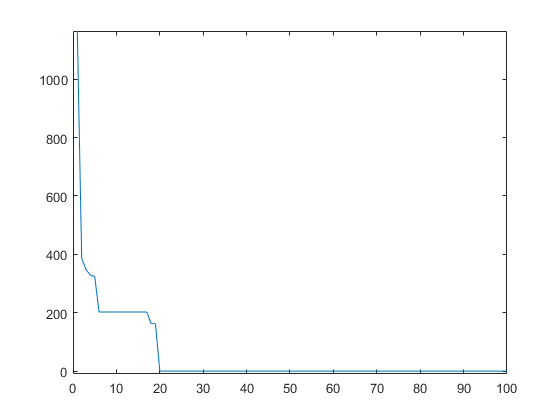

In [152]:
figure(1)
x_axis=1:iter_number;
y_axis=obj(x_axis);
xlabel('iteration number')
ylabel('gap in objective value')
plot(x_axis,y_axis)
ylim([-10 inf])
min(y_axis)


ans =

     0




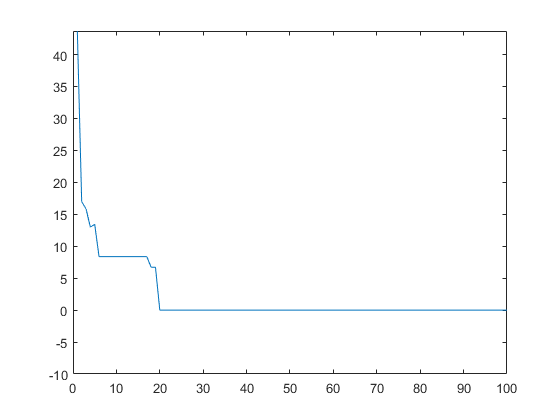

In [149]:
x_axis=1:iter_number;
y_axis=norm_gap(x_axis);
plot(x_axis,y_axis);
ylim([-10 inf])
min(y_axis)

Now we solve the integer least squares problem 

In [ ]:
w_new =hatU2*sils(hatU2,w,1)

In [ ]:
y_k_plus_1=w_new(1:n);
z_k_plus_1=w_new(n+1:2*n-m);

In [ ]:
z_til_k_plus1=z_til+z_k_plus_half-z_k_plus_1;

In [ ]:
y_til_k_plus_1=y_til+y_k_plus_half-y_k_plus_1;

In [ ]:
z_til=z_til_k_plus1;
y_til=y_til_k_plus_1;
z=z_k_plus_1;
y=y_k_plus_1;

In [ ]:
for i=1:100
z_k_plus_half=prox_h(z-z_til,U2,x0,x_star);
y_k_plus_half=proj_pos_orthant(y-y_til);
w=[y_k_plus_half+y_til;
z_k_plus_half+z_til];
w_new =hatU2*sils(hatU2,w,1);
y_k_plus_1=w_new(1:n);
z_k_plus_1=w_new(n+1:2*n-m);
z_til_k_plus1=z_til+z_k_plus_half-z_k_plus_1;
y_til_k_plus_1=y_til+y_k_plus_half-y_k_plus_1;
z_til=z_til_k_plus1;
y_til=y_til_k_plus_1;
z=z_k_plus_1;
y=y_k_plus_1;
end


In [ ]:
y-U2*z

In [ ]:
x0